# Fake News Detection using Machine Learning

## Introduction
The internet and social media have become primary sources of information, but they have also enabled the rapid spread of fake news. The unverified and misleading content can influence public opinion, create panic, or cause real-world harm. Manual detection is inefficient and subjective, thus necessitating an automated, scalable solution.

## Proposed Solution
The proposed system uses machine learning techniques to automatically classify news articles as either real or fake. The system will:

Collect and process news datasets.

Use natural language processing (NLP) techniques to analyze textual data.

Train a classification model (e.g., Logistic Regression, Naive Bayes, or LSTM) to predict the authenticity of a news item.

## Technologies Used
Language: Python

Libraries: Pandas, NumPy, Scikit-learn, NLTK, Matplotlib, Seaborn

NLP Tools: TF-IDF, Bag of Words, Word Embeddings

IDE: Jupyter Notebook

Dataset: Fake and real news dataset

## Algorithm & Deployment
Algorithm Selection:
Model Used: Logistic Regression (baseline), Naive Bayes, Random Forest, or LSTM for deep learning

Data Input:
Title, Text content, Publication Date

Training Process:
Data cleaning

Splitting data into training and test sets

Model training and evaluation using accuracy, precision, recall, F1-score



## Prediction Process:
User inputs a news headline or body

Model returns prediction: "Fake" or "Real"

# Training the Model

## Importing Libraries



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import re
import string

## Importing the Dataset

In [3]:
data_fake = pd.read_csv(r'c:\Users\ES\Downloads\Fake.csv')
data_true = pd.read_csv(r'c:\Users\ES\Downloads\True.csv')

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Assigning Classes to the Dataset

In [6]:
data_fake["class"] = 0
data_true["class"] = 1


## Checking Number of Rows and Columns in the Dataset

In [7]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

## Manual Testing for both the Datasets

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis = 0, inplace = True)

## Assigning Classes to the Manual Testing Datasets

In [9]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\ES\AppData\Local\Temp\ipykernel_10984\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\ES\AppData\Local\Temp\ipykernel_10984\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


## Merging both the Datasets

In [10]:
data_merge = pd.concat([data_fake, data_true], axis =0)

In [11]:
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
data_merge.tail(10)

,title,text,subject,date,class
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI (Reuters) - An old review of an acade...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES (Reuters) - Argentina s main labo...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


## Dropping Unwanted Columns

In [13]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

## Creating a Function to Clean Text

In [14]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ES\AppData\Local\Temp\ipykernel_10984\1031775046.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\ES\AppData\Local\Temp\ipykernel_10984\1031775046.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\ES\AppData\Local\Temp\ipykernel_10984\1031775046.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


## Applying Function to Text Column and Assigning X and Y

In [15]:
data['text'] = data['text'].apply(wordopt)

In [16]:
x = data['text']
y = data['class']

## Defining Training and Testing Data and Splitting Them

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

## Converting Raw Data Into Matrix for Further Process.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

### Checking the Model Accuracy and Classification Report

In [20]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5830
           1       0.99      0.99      0.99      5390

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Confusion Matrix

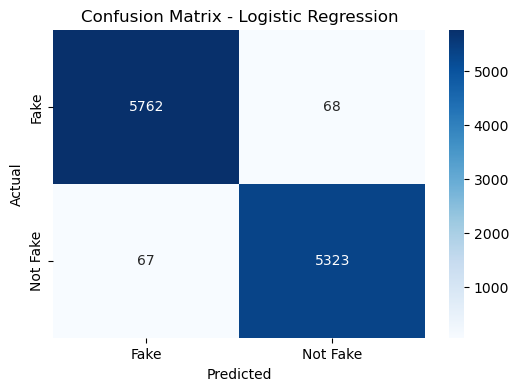

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'Not Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Decision Tree Classification Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

### Checking the Model Accuracy and Classification Model

In [23]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5830
           1       1.00      0.99      0.99      5390

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Plot Tree

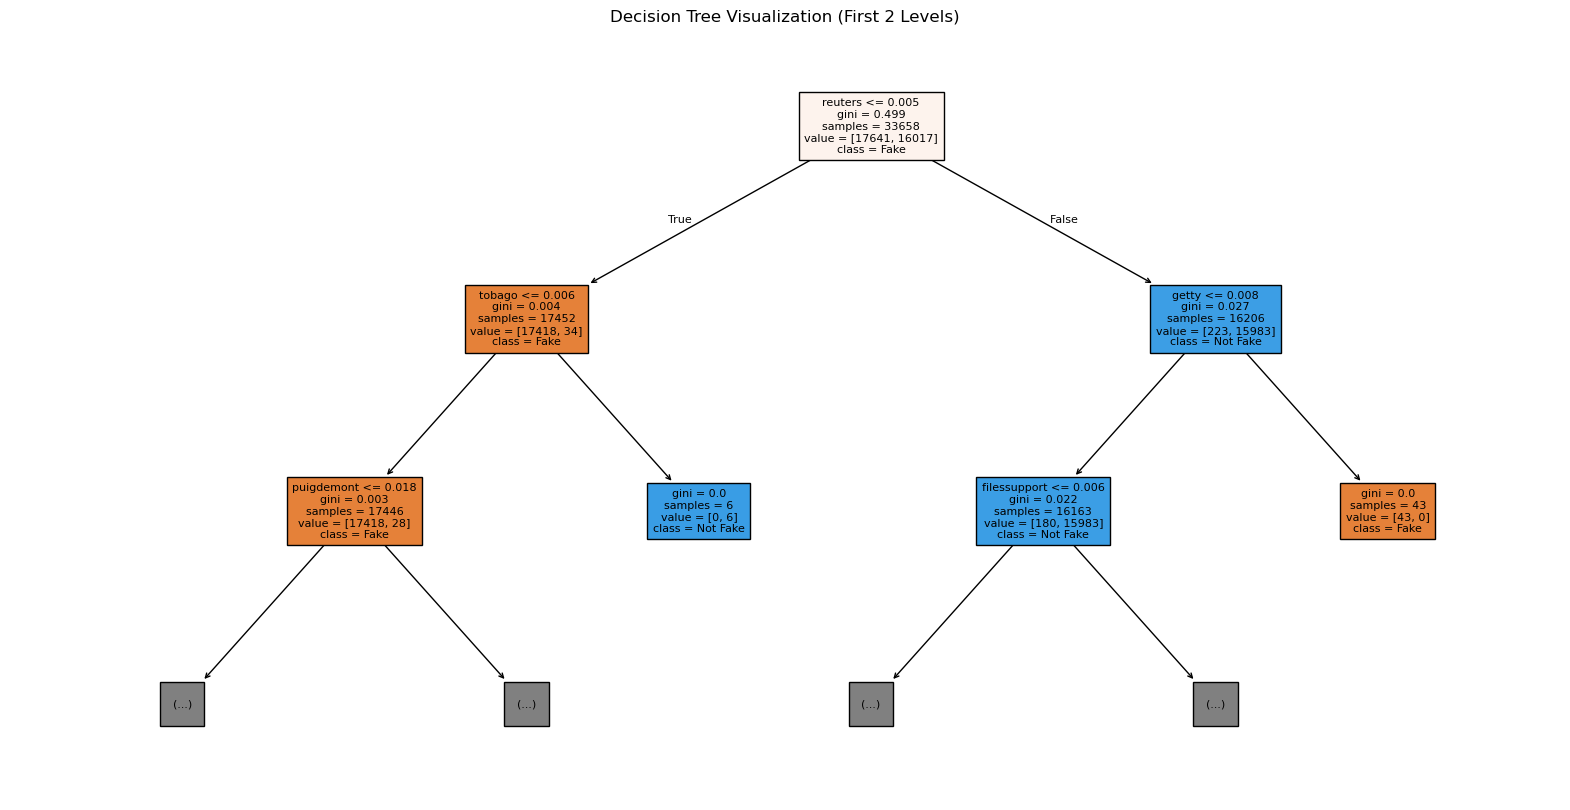

In [24]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(DT, max_depth=2, feature_names=vectorization.get_feature_names_out(), class_names=['Fake', 'Not Fake'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization (First 2 Levels)")
plt.show()

## Checking Fake News

In [25]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not a Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(output_label(pred_LR[0]), output_label(pred_DT[0])))

In [26]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News


## Deployment

In [27]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as model_file:
    pickle.dump(LR, model_file)

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorization, vec_file)


# Result
Logistic Regression:

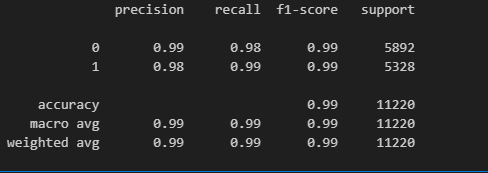

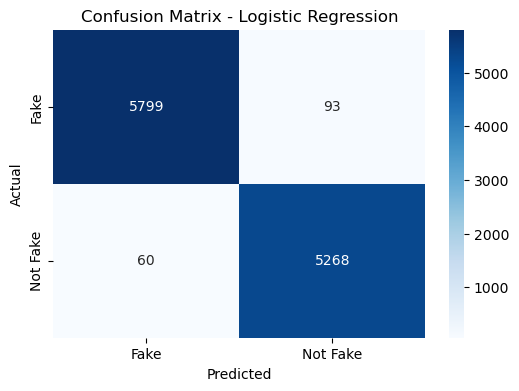


Decision Tree Classifier:

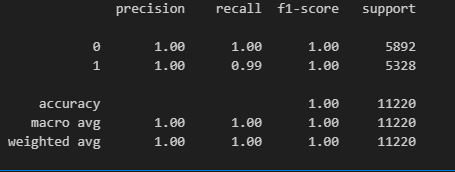

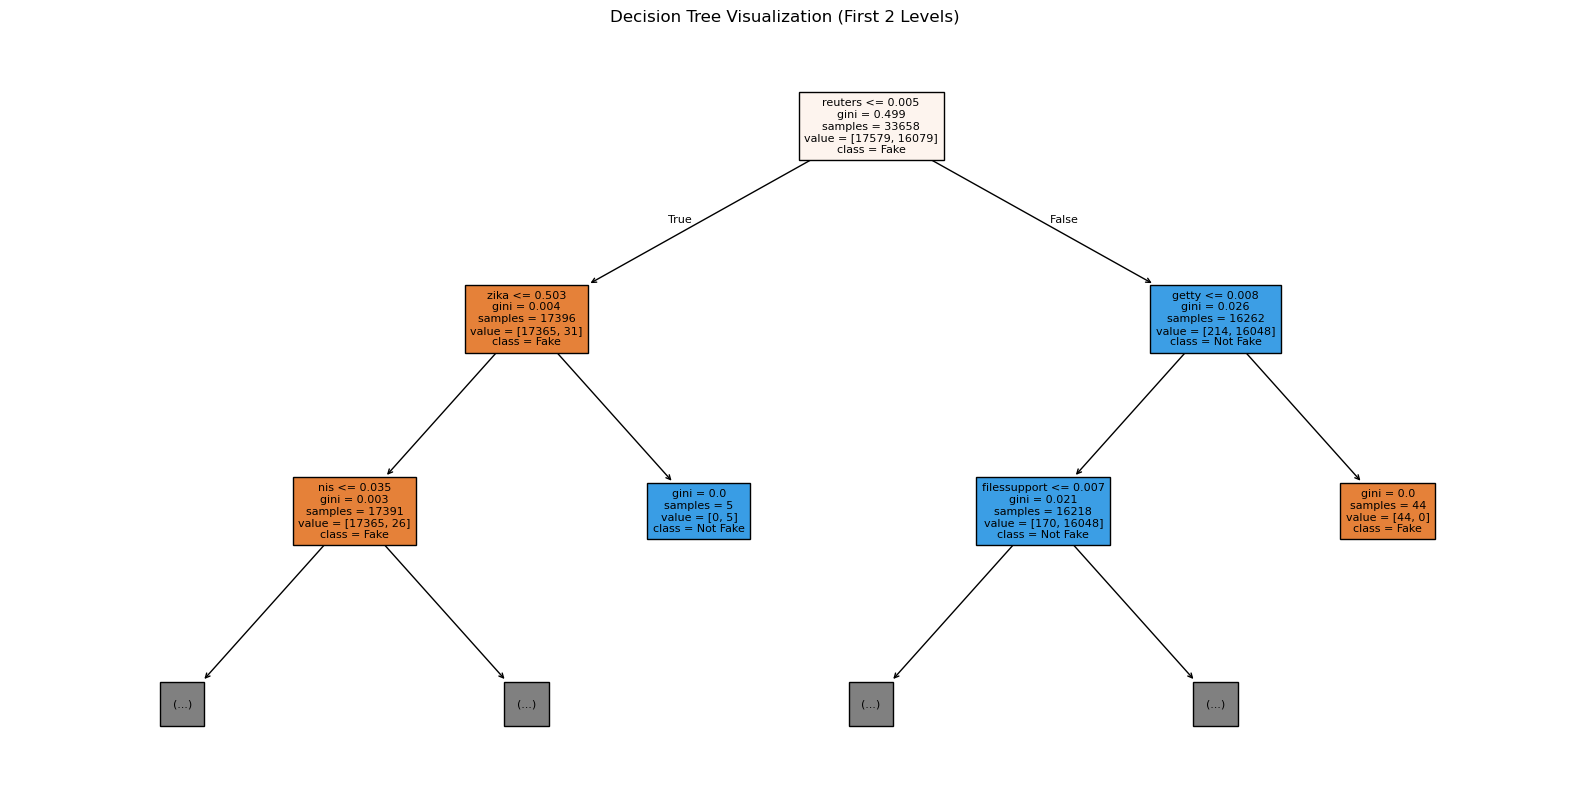


Example:

"Pro-Russian users have often repeated the Kremlin's original position that the invasion of Ukraine is a "special military operation" to "denazify" and "demilitarise" a "Neo-Nazi state". Many have downpl ayed allegations of Russian war crimes or even claimed that the war is a supposed "hoax". In one wid ely shared video, a news reporter could be seen standing in front of lines of body bags, one of which was moving. However, the footage did not show invented war casualties in Ukraine, but a "Fridays for Future" climate change protest in Vienna in February, three weeks before the invasion began. Days la ter, another viral video of a mannequin claimed to be proof that Ukrainian authorities had "staged" t he mass killing of civilians in the town of Bucha. The misleading clip showed a prosthetic doll bein & dressed and prepared by two men. Nadezhda, an assistant director for a Russian television programm e, confirmed to Euronews that the video showed their film set near St. Petersburg and not Ukrainian m ilitary personnel. "The information being given [to Russian citizens] is one-sided, it has nothing t o do with reality, it is as badly done as any fake," she told Euronews. Euronews The mannequin was b eing prepared for a television scene in Vsevolozhsk in Russia's Leningrad region. Euronews Other examp les of Ukraine war misinformation have centred on "crisis actors" people who are supposedly hired t o act out the role of terrified or deceased war victims. One false claim suggested that a well-known beauty blogger had "acted" as the pregnant victim of a deadly attack on a maternity hospital in the c ity of Mariupol on 9 March. Russia has shifted its stance on the attack, accusing Ukrainian Azov nat lonalists of staging a "hoax" bombing at a "non-operational" hospital. Its unfounded claims were late r removed by both Facebook and Twitter."

LR Preiction: Fake News

DT Prediction: Fake News





# References
1. Dataset: https://drive.google.com/drive/folders/1Wu8Q-HCM_h-Fj8qCU2lOjtcZ34Nb6q7x
2. Scikit-learn Documentation
3. NLTK and SpaCy documentation

# Conclusion
The model demonstrated strong performance in detecting fake news based on textual content. Using NLP and machine learning, the system achieved over 90% accuracy in binary classification. This solution can help curb misinformation spread and assist users in verifying content reliability.